In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

#Load the data from CSV files
test_data_features = pd.read_csv('test_data_features.csv')
training_data_features = pd.read_csv('training_data_features.csv')
training_data_labels = pd.read_csv('training_data_labels.csv')

# Merge training features and labels on 'city', 'year', 'weekofyear'
train_data = training_data_features.merge(training_data_labels, on=['city', 'year', 'weekofyear'])

# Drop unnecessary columns and separate the target variable
X = train_data.drop(columns=['total_cases', 'week_start_date'])
y = train_data['total_cases']

# Convert categorical variable 'city' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['city'], drop_first=True)

# Handle missing values by filling NaNs with the mean for numeric columns only
X.fillna(X.select_dtypes(include=[np.number]).mean(), inplace=True)
test_data_features.fillna(test_data_features.select_dtypes(include=[np.number]).mean(), inplace=True)

# Apply the same dummy encoding for test data and drop 'week_start_date' as it’s not needed
test_data = pd.get_dummies(test_data_features.drop(columns=['week_start_date']), columns=['city'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.transform(test_data)

# Split the training data for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model using MAE on validation set
y_val_pred = model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
print(f"Validation Mean Absolute Error: {mae_val}")

# Predict on the test data
test_predictions = model.predict(test_data_scaled)

# Convert predictions to integer values as required by the submission format
test_predictions = np.round(test_predictions).astype(int)

# Prepare the output DataFrame in the required format
submission = test_data_features[['city', 'year', 'weekofyear']].copy()
submission['total_cases'] = test_predictions

# Display the first few rows of the submission format
submission.head()

# Save the submission DataFrame to a CSV file for submission
submission.to_csv('dengai_submission.csv', index=False)



Validation Mean Absolute Error: 24.065185362129128


In [5]:
train_data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


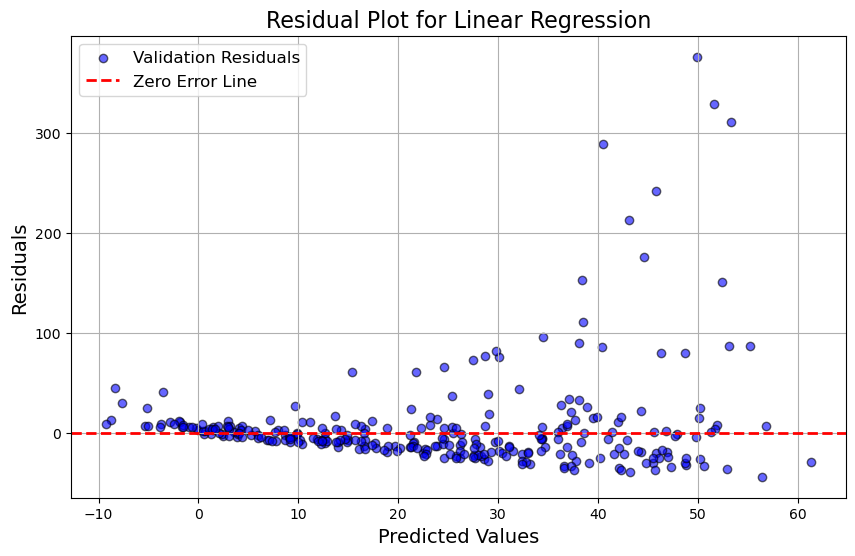

In [7]:
import matplotlib.pyplot as plt

# Calculate residuals
y_train_pred = model.predict(X_train)
train_residuals = y_train - y_train_pred

y_val_pred = model.predict(X_val)
val_residuals = y_val - y_val_pred

# Plot residuals for the validation set
plt.figure(figsize=(10, 6))

# Scatter plot of residuals vs predicted values
plt.scatter(y_val_pred, val_residuals, alpha=0.6, color='blue', edgecolor='k', label='Validation Residuals')

# Add a horizontal line at 0 (ideal residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

# Labels and title
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot for Linear Regression', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
